In [68]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [69]:
# Одновимірні
def harmonic_function(X):
    return X**3 * (3 - X)**5 * np.sin(10 * np.pi * X)

def parametric_function(X, a=0, b=4, m=3, n=4, p=10, q=11):
    return (a - X)**m * (b - X)**n * np.sin(p * np.pi * X) * np.sin(q * np.pi * X)

# Двовимірні
def easom_function(X):
    x, y = X[0], X[1]
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

def erkli_function(X):
    x, y = X[0], X[1]
    return (-20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) -
            np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) +
            np.e + 20)
def cross_in_tray(X):
    x, y = X[0], X[1]
    expr = np.abs(np.sin(x) * np.sin(y) * np.exp(np.abs(100 - np.sqrt(x**2 + y**2) / np.pi)))
    return -0.0001 * (expr + 1) ** 0.1
def eggholder(X):
    x, y = X[0], X[1]
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(x / 2 + y + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - y - 47)))
    return term1 + term2
def holder_table(X):
    x, y = X[0], X[1]
    return -np.abs(np.sin(x) * np.cos(y) *
                   np.exp(np.abs(1 - np.sqrt(x**2 + y**2) / np.pi)))
def schaffer_1(X):
    x, y = X[0], X[1]
    numerator = np.sin(x**2 - y**2)**2 - 0.5
    denominator = (1 + 0.001 * (x**2 + y**2))**2
    return 0.5 + numerator / denominator
def schaffer_2(X):
    x, y = X[0], X[1]
    numerator = np.cos(np.sin(np.abs(x**2 - y**2)))**2 - 0.5
    denominator = (1 + 0.001 * (x**2 + y**2))**2
    return 0.5 + numerator / denominator

# Багатовимірна
def rastrigin_function(X, A=10):
    x = np.asarray(X)
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))


In [70]:
functions = {
    "Harmonic": {
        "func": harmonic_function,
        "bounds": [(0, 3)],
        "opt_value": -32.96,  
        "opt_position": 1.15
    },
    "Parametric": {
        "func": parametric_function,
        "bounds": [(0, 4)],
        "opt_value": 0.296,
        "opt_position": 2.81
    },
    "Easom": {
        "func": easom_function,
        "bounds": [(-100, 100), (-100, 100)],
        "opt_value": -1.0,
        "opt_position": [np.pi, np.pi]
    },
    "Erkli": {
        "func": erkli_function,
        "bounds": [(-5, 5), (-5, 5)],
        "opt_value": 0.0,
        "opt_position": [0, 0]
    },
    "Cross-in-tray": {
        "func": cross_in_tray,
        "bounds": [(-10, 10), (-10, 10)],
        "opt_value": -2.06261,
        "opt_position": [1.34941, 1.34941]  # інші теж можливі
    },
    "Eggholder": {
        "func": eggholder,
        "bounds": [(-512, 512), (-512, 512)],
        "opt_value": -959.6407,
        "opt_position": [512, 404.2319]
    },
    "Holder Table": {
        "func": holder_table,
        "bounds": [(-10, 10), (-10, 10)],
        "opt_value": -19.2085,
        "opt_position": [8.05502, 9.66459]  # є 4 еквівалентні
    },
    "Schaffer 1": {
        "func": schaffer_1,
        "bounds": [(-100, 100), (-100, 100)],
        "opt_value": 0.0,
        "opt_position": [0, 0]
    },
    "Schaffer 2": {
        "func": schaffer_2,
        "bounds": [(-100, 100), (-100, 100)],
        "opt_value": 0.292579,
        "opt_position": [0, 1.25313]
    },
    "Rastrigin": {
        "func": rastrigin_function,
        "bounds": [(-5.12, 5.12)] * 3,  # або n змінних
        "opt_value": 0,
        "opt_position": [0] * 3
    }
}


In [ ]:
def decode_chromosome(chromosome, bounds, bits_per_dim):
    result = []
    for i, (a, b) in enumerate(bounds):
        start = i * bits_per_dim
        end = start + bits_per_dim
        gene = chromosome[start:end]
        dec = int("".join(str(int(g)) for g in gene), 2)
        x = a + dec * (b - a) / (2**bits_per_dim - 1)
        result.append(x)
    return np.array(result)

def generate_population(pop_size, bits_per_dim, num_dims):
    chromosome_length = bits_per_dim * num_dims
    return np.random.randint(0, 2, (pop_size, chromosome_length))

def evaluate_population(fitness_function, population, bounds, bits_per_dim):
    fitness = []
    for chrom in population:
        x = decode_chromosome(chrom, bounds, bits_per_dim)
        fitness.append(fitness_function(x))
    return np.array(fitness)

def selection(population, fitness, num_parents):
    fitness_min = np.min(fitness)
    adjusted_fitness = fitness - fitness_min
    probabilities = np.exp(-adjusted_fitness)
    probabilities += 1e-10
    probabilities /= np.sum(probabilities)
    selected_indices = np.random.choice(len(population), size=num_parents, replace=False, p=probabilities)
    return population[selected_indices]

def single_point_crossover(parent1, parent2):
    if np.random.rand() > 0.8:
        return parent1.copy(), parent2.copy()
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

def uniform_crossover(parent1, parent2, prob=0.5):
    if np.random.rand() > 0.8:
        return parent1.copy(), parent2.copy()
    mask = np.random.rand(len(parent1)) < prob
    child1 = np.where(mask, parent1, parent2)
    child2 = np.where(mask, parent2, parent1)
    return child1, child2

def mutate(chromosome, mutation_rate=0.05):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

def genetic_algorithm(fitness_function, bounds, bits_per_dim=32, pop_size=20, generations=100, elite_frac=0.1, patience=5):
    num_dims = len(bounds)
    population = generate_population(pop_size, bits_per_dim, num_dims)
    elite_count = max(1, int(elite_frac * pop_size))
    best_values = []
    all_values = []

    best_score = np.inf
    no_improve_counter = 0

    for gen in range(generations):
        fitness = evaluate_population(fitness_function, population, bounds, bits_per_dim)
        sorted_indices = np.argsort(fitness)
        elites = population[sorted_indices[:elite_count]]
        best_idx = sorted_indices[0]
        best_x = decode_chromosome(population[best_idx], bounds, bits_per_dim)
        best_f = fitness[best_idx]
        best_values.append((best_x, best_f))

        if best_f < best_score:
            best_score = best_f
            no_improve_counter = 0
        else:
            no_improve_counter += 1

        if no_improve_counter >= patience:
            print(f"Early stopping at generation {gen}")
            break

        all_x = np.array([decode_chromosome(ind, bounds, bits_per_dim) for ind in population])
        all_values.append(all_x)

        num_parents = pop_size - elite_count
        if num_parents % 2 != 0:
            num_parents += 1

        selected = selection(population, fitness, num_parents)
        next_population = []

        for i in range(0, pop_size - elite_count, 2):
            p1, p2 = selected[i], selected[i + 1]
            c1, c2 = uniform_crossover(p1, p2)
            next_population.append(mutate(c1))
            next_population.append(mutate(c2))

        next_population = elites.tolist() + next_population[:pop_size - elite_count]
        population = np.array(next_population)

    return best_values, all_values


In [72]:
def gwo(fitness_function, bounds, num_agents=30, max_iter=100,
        patience=20, extremum=None, tolerance=1e-6):
    dim = len(bounds)
    a_decay = 2 / max_iter

    positions = np.random.rand(num_agents, dim)
    for i in range(dim):
        a, b = bounds[i]
        positions[:, i] = a + positions[:, i] * (b - a)

    alpha_pos = np.zeros(dim)
    alpha_score = np.inf

    beta_pos = np.zeros(dim)
    beta_score = np.inf

    delta_pos = np.zeros(dim)
    delta_score = np.inf

    alpha_history = []
    all_history = []

    best_score = np.inf
    no_improve_counter = 0

    for iter in range(max_iter):
        for i in range(num_agents):
            fitness = fitness_function(positions[i])

            if fitness < alpha_score:
                alpha_score = fitness
                alpha_pos = positions[i].copy()
            elif fitness < beta_score:
                beta_score = fitness
                beta_pos = positions[i].copy()
            elif fitness < delta_score:
                delta_score = fitness
                delta_pos = positions[i].copy()

        all_history.append(positions.copy())
        alpha_history.append((alpha_pos.copy(), alpha_score))

        if extremum is not None and abs(alpha_score - extremum) <= tolerance:
            print(f"Target extremum {extremum} reached with tolerance {tolerance} at iteration {iter}")
            break

        if alpha_score < best_score:
            best_score = alpha_score
            no_improve_counter = 0
        else:
            no_improve_counter += 1

        if no_improve_counter >= patience:
            print(f"Early stopping at iteration {iter} (no improvement)")
            break

        a = 2 - iter * a_decay

        for i in range(num_agents):
            for j in range(dim):
                r1, r2 = np.random.rand(), np.random.rand()
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = abs(C1 * alpha_pos[j] - positions[i, j])
                X1 = alpha_pos[j] - A1 * D_alpha

                r1, r2 = np.random.rand(), np.random.rand()
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = abs(C2 * beta_pos[j] - positions[i, j])
                X2 = beta_pos[j] - A2 * D_beta

                r1, r2 = np.random.rand(), np.random.rand()
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = abs(C3 * delta_pos[j] - positions[i, j])
                X3 = delta_pos[j] - A3 * D_delta

                positions[i, j] = (X1 + X2 + X3) / 3
                positions[i, j] = np.clip(positions[i, j], bounds[j][0], bounds[j][1])

    return alpha_history, all_history


In [73]:
def plot_optimization_summary(func, bounds, history, all_positions=None, extremum=None):
    dim = len(bounds)
    generations = len(history)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Prepare subplot (0, 0): Plot the function (1D, 2D) or population fitness
    ax = axes[0, 0]
    if dim == 1:
        x = np.linspace(bounds[0][0], bounds[0][1], 1000)
        y = np.array([func(np.array([val])) for val in x])
        ax.plot(x, y, label='Objective function')
        if all_positions is not None:
            for gen_positions in all_positions:
                ax.scatter(gen_positions[:, 0], [func(p) for p in gen_positions], alpha=0.2, s=10)
        ax.set_title("Objective Function (1D)")
    elif dim == 2:
        x = np.linspace(bounds[0][0], bounds[0][1], 100)
        y = np.linspace(bounds[1][0], bounds[1][1], 100)
        X, Y = np.meshgrid(x, y)
        Z = np.array([[func(np.array([x_, y_])) for x_, y_ in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
        contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
        fig.colorbar(contour, ax=ax)
        if all_positions is not None:
            for gen_positions in all_positions:
                ax.scatter(gen_positions[:, 0], gen_positions[:, 1], alpha=0.2, s=10)
        ax.set_title("Objective Function (2D)")
    else:
        if all_positions is not None:
            fitness_per_iter = [np.array([func(p) for p in gen]) for gen in all_positions]
            ax.boxplot(fitness_per_iter, showfliers=False)
            ax.set_title("Population Fitness Distribution (dim ≥ 3)")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("Function value")

    # Prepare subplot (0, 1): Contour plot (only for 2D)
    ax = axes[0, 1]
    if dim == 2:
        contour = ax.contourf(X, Y, Z, levels=50, cmap='plasma')
        fig.colorbar(contour, ax=ax)
        ax.set_title("Contour Plot (2D)")
    else:
        ax.text(0.5, 0.5, "Contour not available", ha='center', va='center', fontsize=14)
        ax.set_title("Not applicable")
    ax.set_xticks([])
    ax.set_yticks([])

    # Prepare subplot (1, 0): Best fitness over time
    ax = axes[1, 0]
    best_fitnesses = [score for _, score in history]
    ax.plot(range(generations), best_fitnesses, marker='o')
    ax.set_title("Best Fitness per Iteration")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Best Fitness")

    # Prepare subplot (1, 1): Distance from optimum
    ax = axes[1, 1]
    if extremum is not None:
        distances = [abs(score - extremum) for _, score in history]
        ax.plot(range(generations), distances, marker='o', color='red')
        ax.set_title("Distance to Optimum")
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Distance |f_best - f_opt|")
    else:
        ax.text(0.5, 0.5, "Extremum not provided", ha='center', va='center', fontsize=14)
        ax.set_title("Distance to Optimum")
    plt.tight_layout()
    plt.show()

Running algorithms for: Harmonic
Early stopping at generation 10 (no improvement)
Early stopping at iteration 16 (no improvement)
GA Plot for Harmonic


ValueError: x and y can be no greater than 2D, but have shapes (11,) and (11, 1, 1)

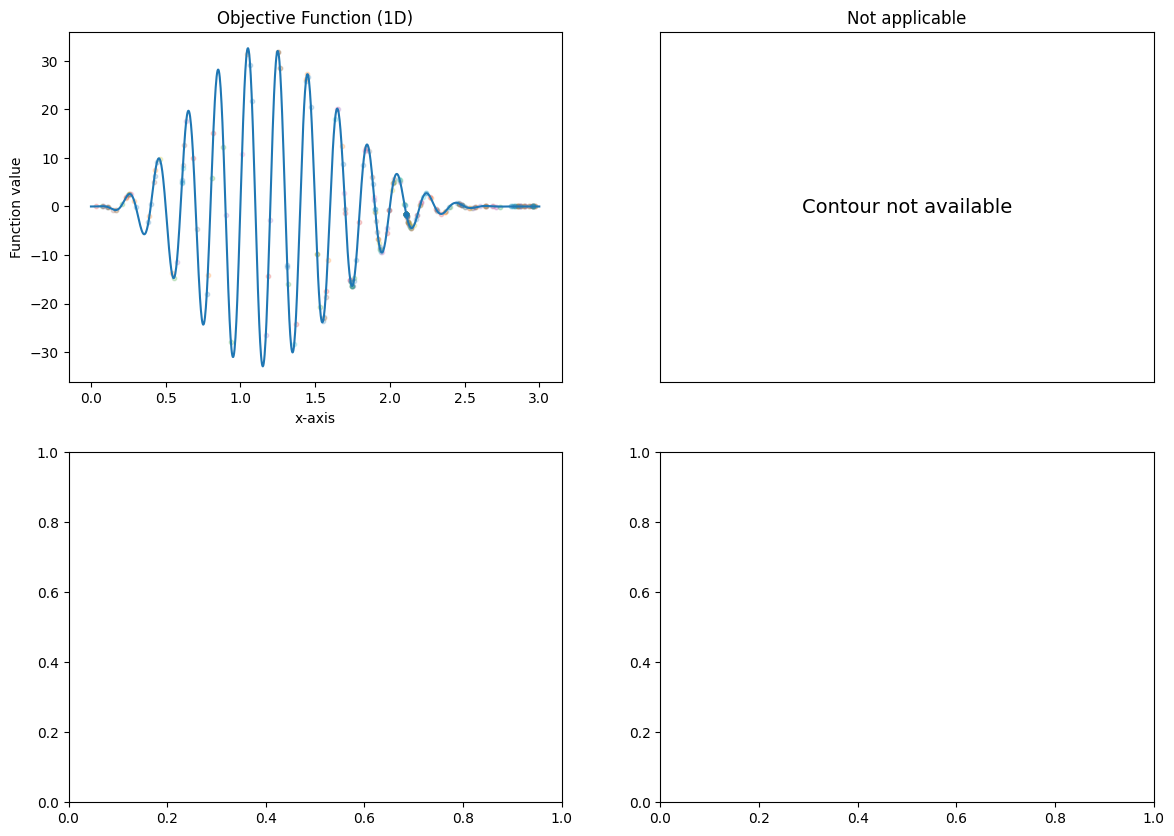

In [74]:
for name, info in functions.items():
    print(f"Running algorithms for: {name}")
    func = info["func"]
    bounds = info["bounds"]
    opt_value = info["opt_value"]

    # Run Genetic Algorithm
    ga_best, ga_all = genetic_algorithm(
        func, bounds,
        bits_per_dim=16,
        generations=50,
        pop_size=30,
        extremum=opt_value,
        tolerance=1e-4,
        patience=10
    )

    # Run Grey Wolf Optimizer
    gwo_best, gwo_all = gwo(
        func, bounds,
        max_iter=50,
        extremum=opt_value,
        tolerance=1e-4,
        patience=10
    )

    # Plot summary for GA
    print(f"GA Plot for {name}")
    plot_optimization_summary(
        func=func,
        bounds=bounds,
        history=ga_best,
        all_positions=ga_all,
        extremum=opt_value
    )

    # Plot summary for GWO
    print(f"GWO Plot for {name}")
    plot_optimization_summary(
        func=func,
        bounds=bounds,
        history=gwo_best,
        all_positions=gwo_all,
        extremum=opt_value
    )

In [75]:
genetic_algorithm(harmonic_function, [(0, 3)], bits_per_dim=16, generations=100, pop_size=30, tolerance=1e-4, patience=10)

Early stopping at generation 10 (no improvement)


([(array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]])),
  (array([0.86944381]), array([[23.63524534]]))],
 [array([[0.86944381],
         [2.93389792],
         [2.77514305],
         [0.40640879],
         [2.05978485],
         [1.17431907],
         [2.96214237],
         [2.60682078],
         [0.15674067],
         [1.78855573],
         [1.63227283],
         [2.75490959],
         [2.56987869],
         [1.5850309 ],
         [2.40494392],
         [2.55083543],
         [2.56113527],
         [2.70093843],
         [0.61322957],
         [1.26655985],


In [76]:
genetic_algorithm(rastrigin_function, [(-5.12, 5.12)] * 3, bits_per_dim=32, generations=100, pop_size=100, tolerance=1e-4, patience=10)

([(array([-0.94672132,  1.13582573, -1.89832615]),
   np.float64(11.743112840041732)),
  (array([ 1.10552063, -0.81531432,  0.07568157]),
   np.float64(11.131044799950836)),
  (array([ 1.10552063, -0.81531432,  0.07568157]),
   np.float64(11.131044799950836)),
  (array([ 1.10552063, -0.81531432,  0.07568157]),
   np.float64(11.131044799950836)),
  (array([ 1.10552063, -0.81531432,  0.07568157]),
   np.float64(11.131044799950836)),
  (array([-1.98881535,  0.00736546,  0.17124341]),
   np.float64(9.271226451588937)),
  (array([-1.98881535,  0.00736546,  0.17124341]),
   np.float64(9.271226451588937)),
  (array([-1.98881535,  0.00736546,  0.17124341]),
   np.float64(9.271226451588937)),
  (array([-1.98881535,  0.00736546,  0.17124341]),
   np.float64(9.271226451588937)),
  (array([ 0.94629731, -0.89032729, -1.10322373]),
   np.float64(7.781472532790357)),
  (array([ 1.04610552, -0.94844342,  0.06962813]),
   np.float64(3.877321463994072)),
  (array([ 1.04610552, -0.94844342,  0.06962813])